# Task Description
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Below are the list of datasets which are provided for the analysis, on the babsis of the analysis, decision will be taken.

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

# Importing essential libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

# Datasets Loading & visualization

## Cab_Dataset

In [140]:
#Loading Cab_data csv file
cab_ds = pd.read_csv('C:/Other/Data Glaciers/week 2 datasets/Cab_Data.csv')

In [141]:
cab_ds.shape #dimensions of data

(359392, 7)

In [142]:
cab_ds.info() #complete information of a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [143]:
cab_ds.head() #how dataset looks like in first 5 rows 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Data type of 'Date of Travel' needs to be changed from an integer to date format

In [144]:
#correction in date format
travel_date = cab_ds['Date of Travel'].to_list()
date_format = pd.Timestamp('1899-12-29')
dates = [date_format + pd.DateOffset(date_offset) for date_offset in travel_date]
cab_ds['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [145]:
cab_ds.dtypes #verification of the change 

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [146]:
#sorting of cab_data date wise
cab_ds=cab_ds.sort_values(by=['Date of Travel'])
cab_ds=cab_ds.reset_index(drop= True )

In [147]:
cab_ds.head() #data type of all the variables are correct

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840


## City dataset

In [148]:
#Loading Cab_data csv file
city_ds = pd.read_csv('C:/Other/Data Glaciers/week 2 datasets/City.csv')

In [149]:
city_ds.shape #dimensions of data

(20, 3)

In [150]:
city_ds.info() #complete information of a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


'Population' and 'users' datatype should be integer instead of object

In [151]:
city_ds.head() #how dataset looks like in first 5 rows 

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [152]:
#correction in data format of 'Population' & 'Users'

city_ds['Population'] = [x.replace(',','') for x in city_ds['Population']]
city_ds['Population'] = city_ds['Population'].astype(float)

city_ds['Users'] = [x.replace(',','') for x in city_ds['Users']]
city_ds['Users'] = city_ds['Users'].astype(float)

In [153]:
city_ds.dtypes #verification of the change 

City           object
Population    float64
Users         float64
dtype: object

In [154]:
city_ds.head() #data type of 'Population' and 'Users' has been changed successfully

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


## Customer_ID Dataset

In [155]:
#Loading Customer_ID_data csv file
cus_ds = pd.read_csv('C:/Other/Data Glaciers/week 2 datasets/Customer_ID.csv')

In [156]:
cus_ds.shape #dimensions of data

(49171, 4)

In [157]:
cus_ds.info() #complete information of a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [158]:
cus_ds.head() #how dataset looks like in first 5 rows 

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


The dataframe looks good to go

## Transaction_ID Dataset

In [159]:
#Loading Transaction_ID data csv file
trans_ds = pd.read_csv('C:/Other/Data Glaciers/week 2 datasets/Transaction_ID.csv')

In [160]:
trans_ds.shape #dimensions of data

(440098, 3)

In [161]:
trans_ds.info() #complete information of a dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [162]:
trans_ds.head() #how dataset looks like in first 5 rows 

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


The dataframe looks good to go

# Exploratory Data Analysis

In [163]:
#creating master data by merging the three files city, transaction_ID, customer_ID to explain the relation between features
master_data= cab_ds.merge(trans_ds, on= 'Transaction ID').merge(cus_ds, on ='Customer ID').merge(city_ds, on = 'City')

In [164]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0


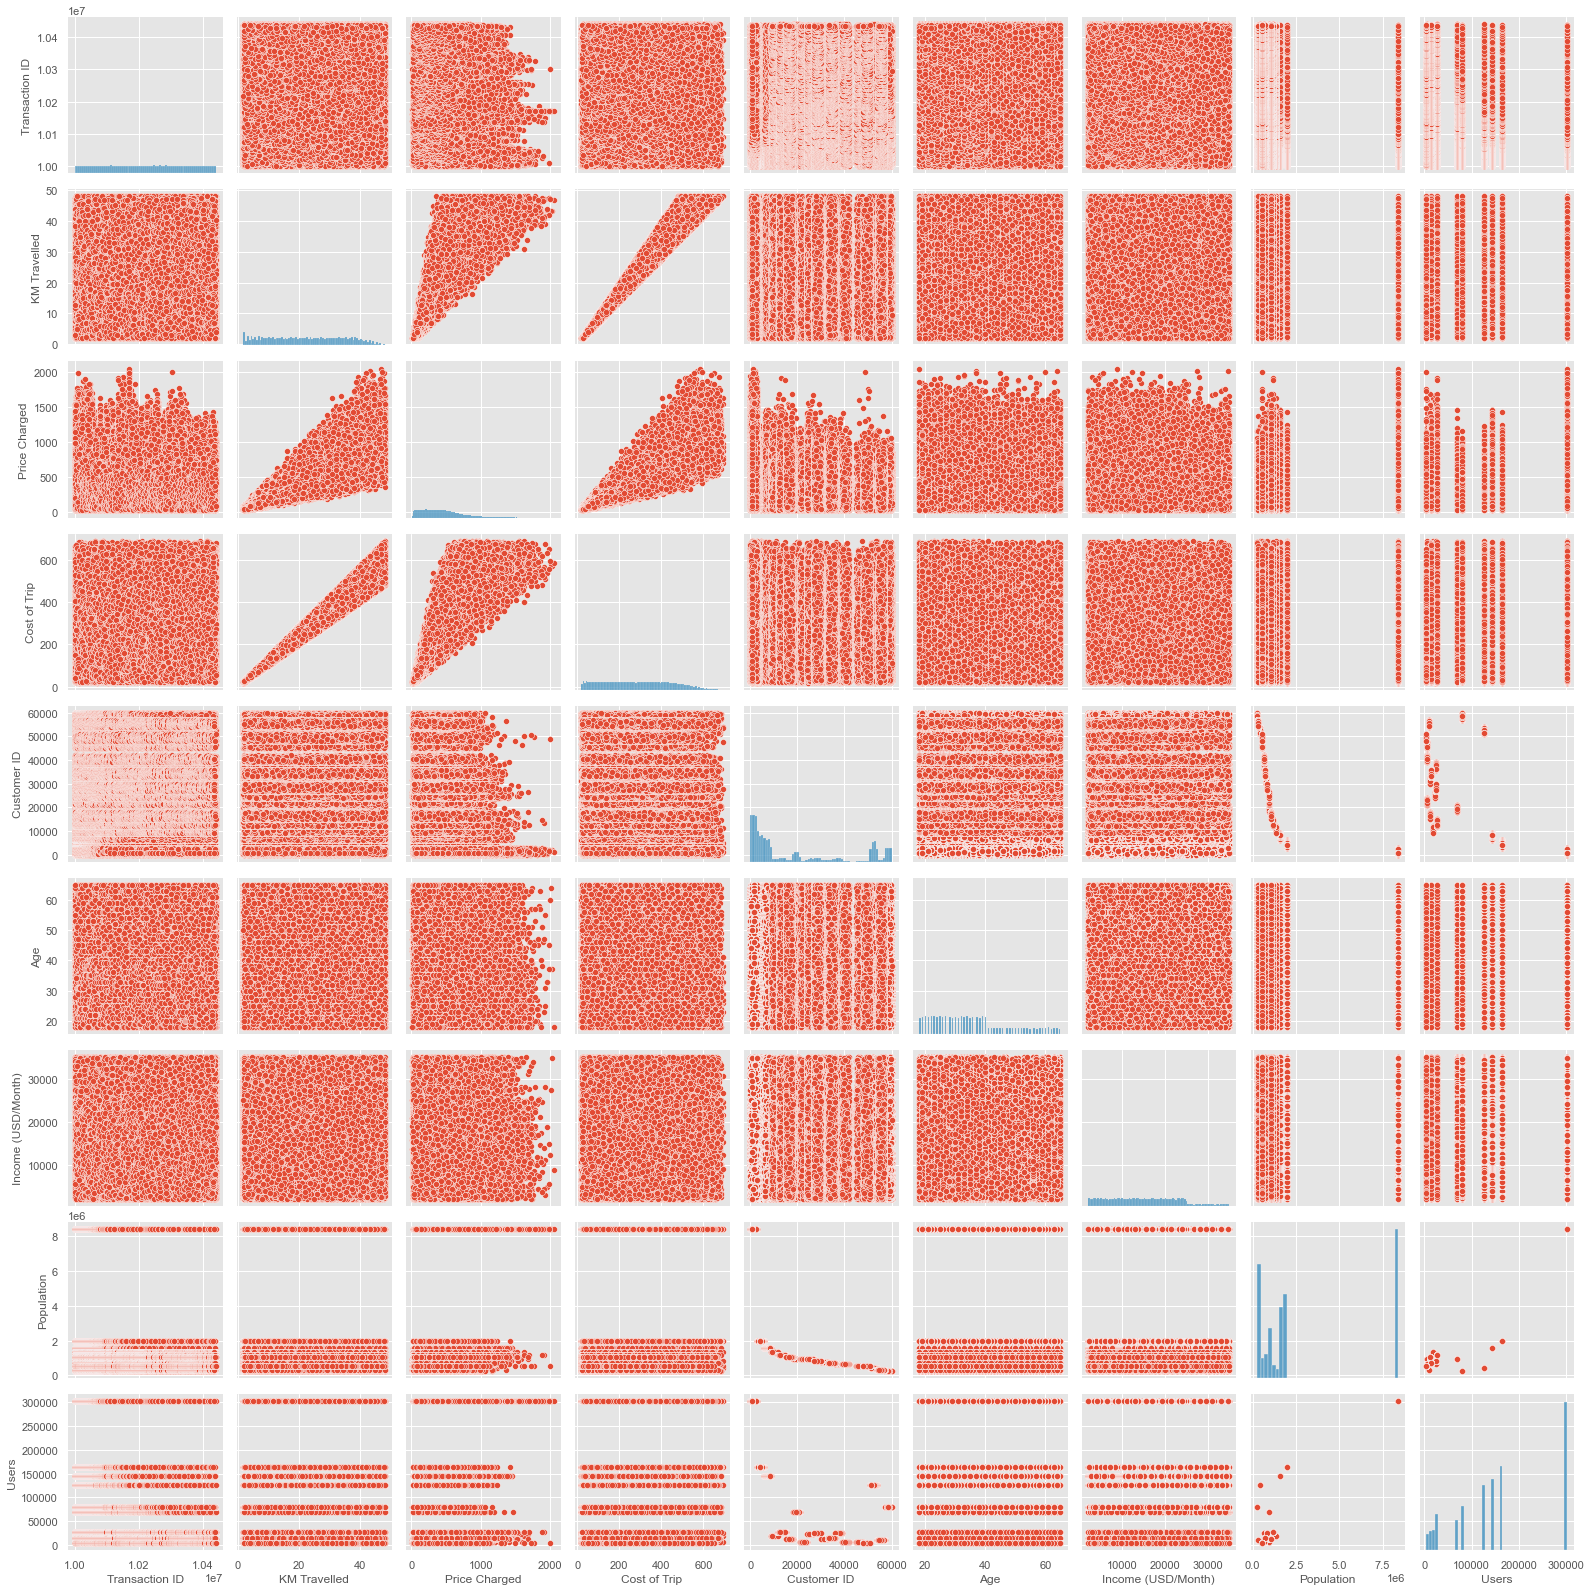

In [165]:
sns.pairplot(master_data)
plt.show()

### Correlation Test

<AxesSubplot:>

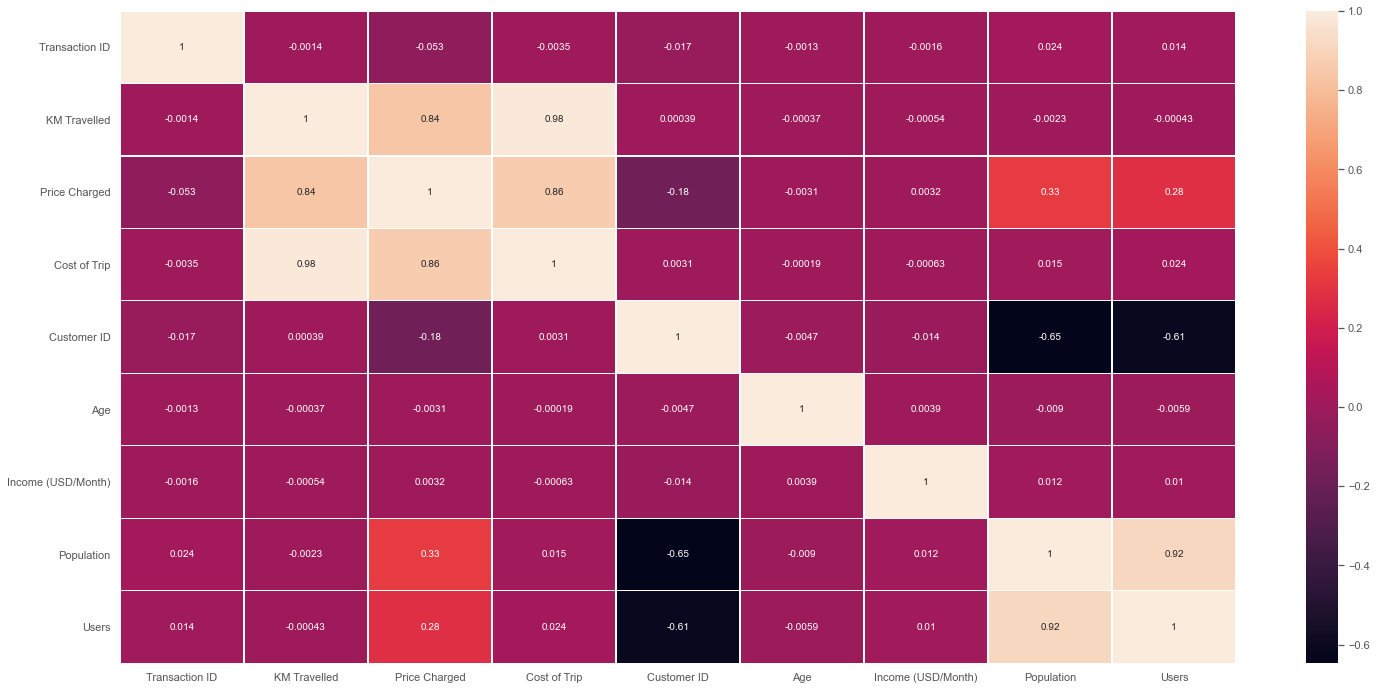

In [166]:
#Correlation between features
plt.figure(figsize = (25, 12))
sns.heatmap(master_data.corr(), annot = True, linewidths=.25) 

There is a strong correlation between Price Charged & KM Travelled, Cost of Trip & M Travelled, Popullation & users

### Gender based comparison

In [167]:
gender=master_data.groupby(['Company','Gender'])
gender = gender['Customer ID'].nunique()
print(gender)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


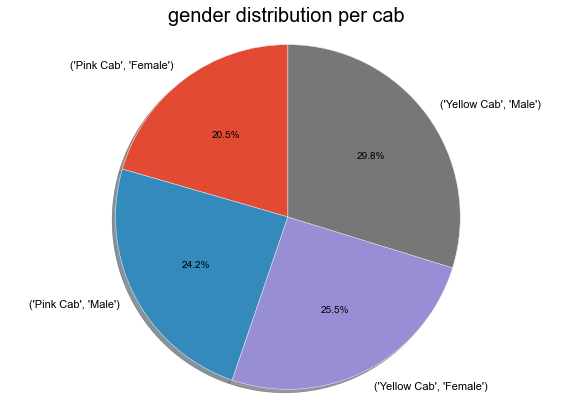

In [168]:
indexes = gender.index
values = gender.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(values , labels=indexes, autopct='%1.1f%%',shadow=True, startangle=90)
axp.axis('equal')

plt.title('gender distribution per cab', fontsize = 20)
plt.show()

Both male and Female, prefers to use Yellow Cab.

### Price based comparison

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


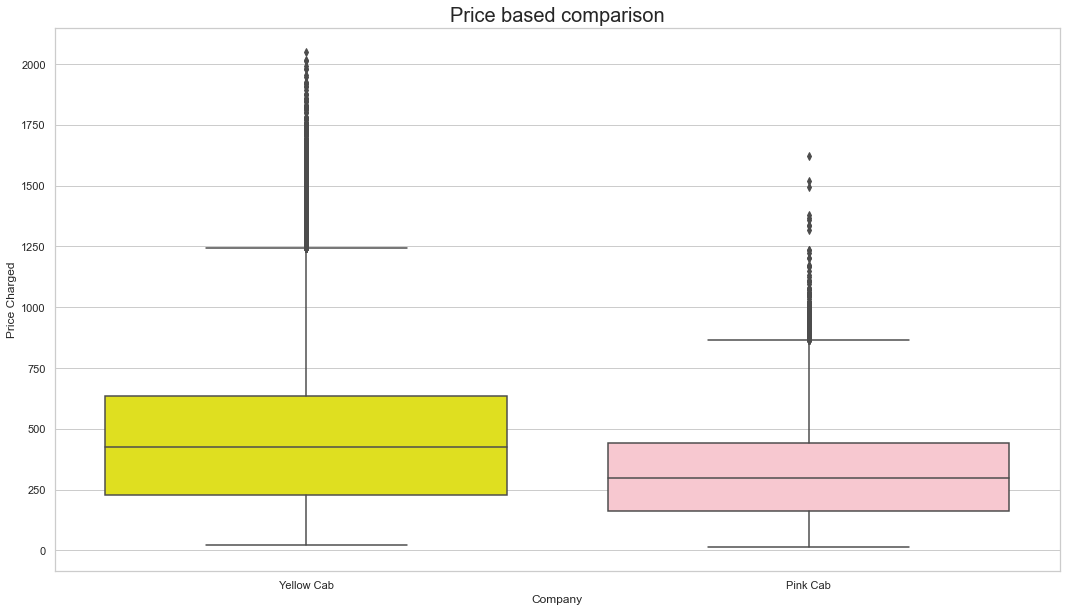

In [169]:
sns.set(style = 'whitegrid')

plt.figure(figsize = (18, 10))

sns.boxplot(master_data['Company'], master_data['Price Charged'], palette=['#FFFF00',"#FFC0CB"])
plt.title('Price based comparison', fontsize=20)
plt.show()

Yellow cab is more expensive as compared to pink cab

### Users based Comparison

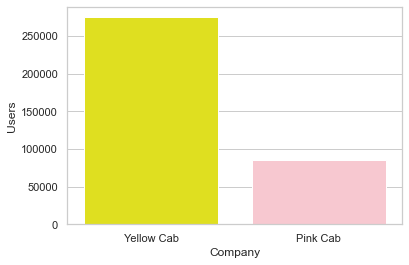

In [170]:
# graphical representation of Company variable (Yellow_cab & Pink_cab)
users = sns.countplot(x="Company", data=master_data, palette=['#FFFF00',"#FFC0CB"]);
users.set(xlabel='Company', ylabel='Users'); 

Clearly, more users like Yellow cab then Pink cab

### Profit based Comparison

In [171]:
company = master_data.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

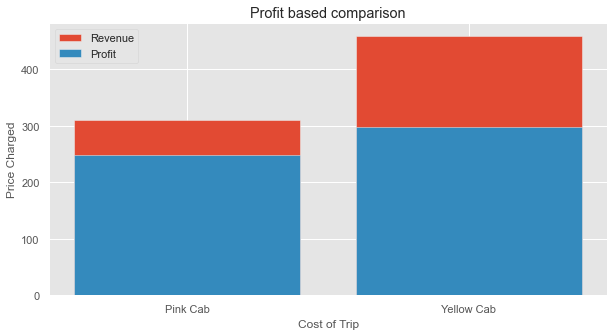

In [172]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
plt.bar(c, c_p,  label="Revenue")
plt.bar(c, c_v,  label="Profit")
plt.title('Profit based comparison')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

Yellow cab generates more profit than pink cab

### Profit per year comparison

In [173]:
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Day'] = master_data['Date of Travel'].dt.day
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

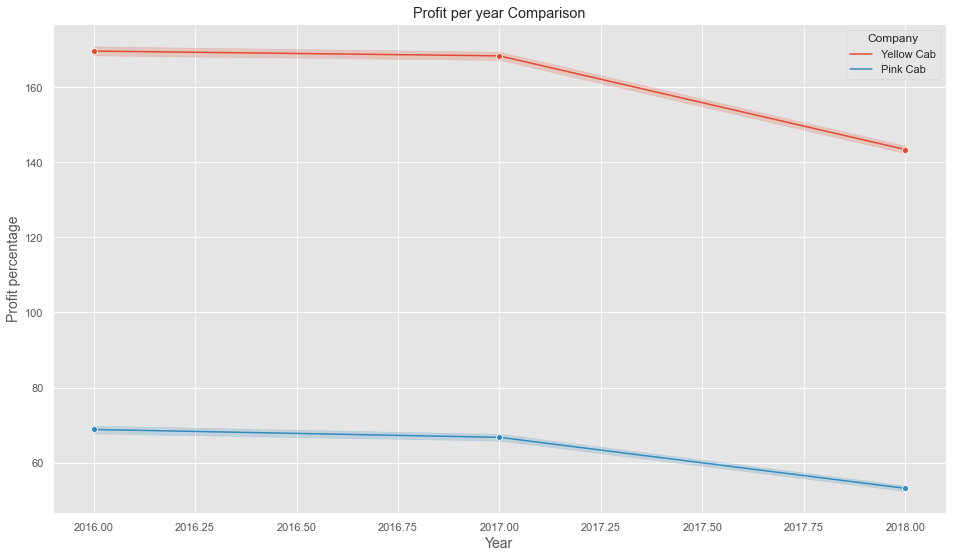

In [174]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=master_data, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit percentage", size=14)
plt.title("Profit per year Comparison")
plt.show()

### Profit based on KM traveled 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profit based on KM traveled ')

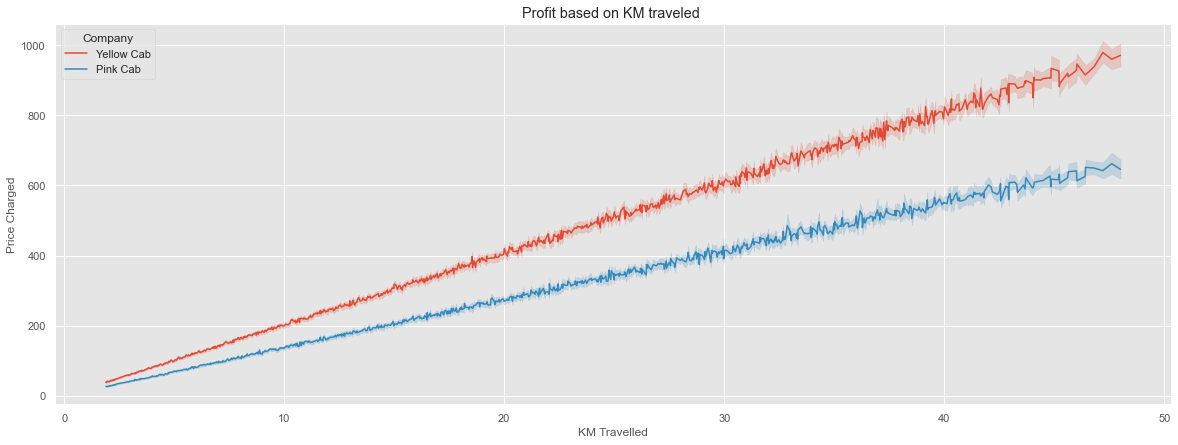

In [175]:
plt.figure(figsize=(20,7))
sns.lineplot(master_data['KM Travelled'],master_data['Price Charged'],hue="Company",data=master_data)
plt.title("Profit based on KM traveled ")

# Hypothesis Testing

# Hypothesis Test 1
Ho= price charges does not impact on profit
H1= price charges have impact on profit

### Yellow Cab

In [176]:
mean_price= np.mean(master_data['Price Charged'])
mean_price

423.4433112590087

In [181]:

x = master_data[(master_data['Price Charged']<=mean_price)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = master_data[(master_data['Price Charged']>mean_price)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that price charges have impact on profit')
else:
    print('We accept null hypothesis (H0) that price charges does not impact on profit')

136828 137853
P value is  0.0
We accept alternative hypothesis (H1) that price charges have impact on profit


### Pink Cab

In [182]:
x = master_data[(master_data['Price Charged']<=mean_price)&(master_data.Company=='pink Cab')].groupby('Transaction ID').Profit.mean()
y = master_data[(master_data['Price Charged']>mean_price)&(master_data.Company=='pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])
_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that price charges have impact on profit')
else:
    print('We accept null hypothesis (H0) that price charges does not impact on profit')


0 0
P value is  nan
We accept null hypothesis (H0) that price charges does not impact on profit


## Hypothesis Test 2
H0 : There is no difference regarding Gender for both cab companies.
H1 : There is difference regarding Gender for both cab companies.

### Yellow Cab

In [179]:
x= master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y= master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


### Pink Cab

In [180]:
x = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])

_, p_value = stats.ttest_ind(x.values,
                             y.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


Gender does not have any impact on profit of both companies

On the basis of above given EDA and hypothesis testing, we can say that investment in yellow cab can be more profitable.